In [1]:
import mortgage
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 8.0]
%matplotlib inline

## Parameters

In [2]:
# Mortgage term
mortgage_term_years = 30
# House value at beginning of mortgage
house_value = 270000.0
# Loan-to-value ratio (i.e. 20% deposit is 80% LTV)
ltv = 80.0/100
# Mortgage fees
fees = 999
# Dictionary of interest rates, key-value pairs can be added to change future rates
interest_rates = { 0: 2.99/100, 3: 4.0/100 } 
# Morgage overpayments, every month
monthly_overpayment = 250.0
initial_loan = ltv * house_value + fees


## Amortization schedule

In [3]:
mortgage_schedule_no_overpayments = mortgage.calc_amortization_schedule(initial_loan, mortgage_term_years, interest_rates)
remaining_principal_no_overpayments = initial_loan - mortgage_schedule_no_overpayments['principal_repaid']

mortgage_schedule_with_overpayments = mortgage.calc_amortization_schedule(initial_loan, mortgage_term_years, interest_rates, monthly_overpayment)
remaining_principal_with_overpayments = initial_loan - mortgage_schedule_with_overpayments['principal_repaid']
years = mortgage_schedule_with_overpayments['year']

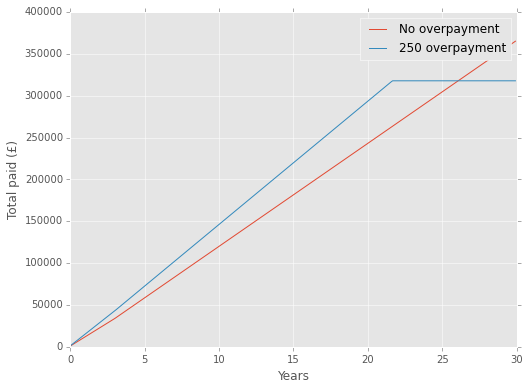

In [4]:
fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(years, mortgage_schedule_no_overpayments['total_paid'], 
       label='No overpayment')
ax.plot(years, mortgage_schedule_with_overpayments['total_paid'],        
        label='{0:.0f} overpayment'.format(monthly_overpayment))
ax.set_xlabel('Years')
ax.set_ylabel(u'Total paid (£)')
ax.legend()

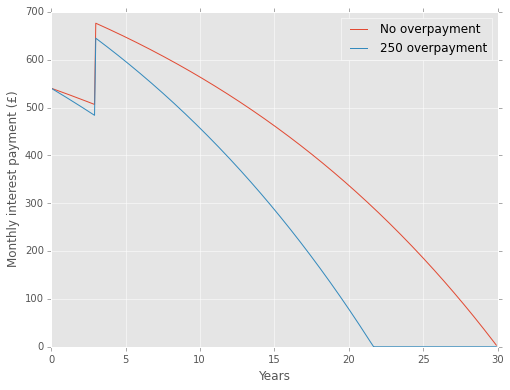

In [5]:
fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(years, mortgage_schedule_no_overpayments['monthly_interest_payment'], 
        label='No overpayment')
ax.plot(years, mortgage_schedule_with_overpayments['monthly_interest_payment'],
        label='{:.0f} overpayment'.format(monthly_overpayment))
ax.set_xlabel('Years')
ax.set_ylabel(u'Monthly interest payment (£)')
ax.legend()

## Future LTV
Future expected loan-to-value can be used to determine what mortgage products may be able in the future. 

In [6]:

annual_house_price_growth_expected = 3.0 / 100

def loan_to_value(remaining_principal):
    future_house_value = house_value * (1 + annual_house_price_growth_expected/12.0) ** np.arange(len(remaining_principal))
    future_loan_to_value = remaining_principal / future_house_value                  
    return future_loan_to_value

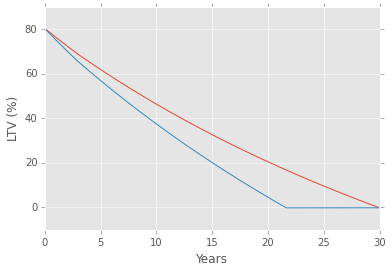

In [7]:
plt.plot( mortgage_schedule_no_overpayments['year'], loan_to_value(remaining_principal_no_overpayments) * 100.0)
plt.plot( mortgage_schedule_no_overpayments['year'], loan_to_value(remaining_principal_with_overpayments) * 100.0)
plt.xlabel('Years')
plt.ylabel('LTV (%)')